# Salary Prediction for Hiring New Employees


In [1]:
import numpy as np
import pandas as pd
import india
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_data = pd.read_csv("Datasets/ML case Study.csv")
emp_colg_data = pd.read_csv('Datasets/Colleges.csv')
emp_city_data = pd.read_csv("Datasets/cities.csv")

In [3]:
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
emp_colg_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
emp_city_data.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
emp_city_data = emp_city_data.rename(columns = {"Metrio City": "metro_city", "non-metro cities": "non_metro_city"})
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [7]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [8]:
emp_colg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [9]:
emp_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [10]:
emp_colg_data = emp_colg_data.fillna(value = "NA")
emp_colg_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
emp_colg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  28 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  28 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [12]:
emp_city_data = emp_city_data.fillna(value="NA")
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [13]:
emp_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [14]:
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [15]:
def colname_modify(cols):
    cols = list(cols)
    for i in range(len(cols)):
        cols[i] = cols[i].lower().replace(" ", "_")
    return cols         

In [16]:
print(colname_modify(emp_data.columns))

['college', 'city', 'role', 'previous_ctc', 'previous_job_change', 'graduation_marks', 'exp_(month)', 'ctc']


In [17]:
emp_data.columns = colname_modify(emp_data.columns)
emp_colg_data.columns = colname_modify(emp_colg_data.columns)

In [18]:
emp_colg_data.head()

,tier_1,tier_2,tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [19]:
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [20]:
emp_data['tier'] = emp_data['college'].apply(lambda x: emp_colg_data.columns[(x == emp_colg_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1


In [21]:
emp_data['city_if_metro'] = emp_data['city'].apply(lambda x: emp_city_data.columns[(x == emp_city_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


In [22]:
india.cities.lookup('Ajmer')

<City: Ajmer>

In [23]:
india.cities.lookup('Ajmer').state

<State: Rajasthan>

In [24]:
india.cities.lookup('Durgapur')

In [25]:
emp_data['state'] = emp_data['city'].apply(lambda x: india.cities.lookup(x).state if india.cities.lookup(x) is not None else "NA")

In [26]:
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro,state
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city,NA
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city,Rajasthan
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city,NA
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city,Rajasthan
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city,NA


In [28]:
state_col = emp_data.pop('state')
emp_data.insert(2,'state',state_col)

In [29]:
emp_data.head()

,college,city,state,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,NA,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Rajasthan,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,NA,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Rajasthan,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,NA,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


### Data Exploration

In [31]:
print(emp_data['college'].value_counts())

KIIT, Bhubaneswar           40
Manipal Main Campus         36
IIT Ropar                   36
VIT Vellore                 36
BITS Pilani (Goa Campus)    36
                            ..
IGDTUW                      14
IIIT Delhi                  14
DAIICT                      13
IIEST/BESU Shibpur          13
VNIT Nagpur                  9
Name: college, Length: 66, dtype: int64


<Axes: xlabel='city', ylabel='count'>

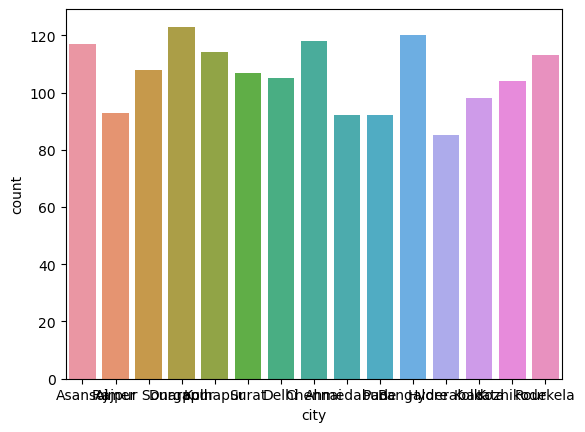

In [27]:
sns.countplot(x = 'city', data = emp_data)